In [8]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib

In [2]:
label_path = './input/labels.csv'
image_path = './input/head_ct/head_ct'

label_df = pd.read_csv(label_path)
image_files = sorted(glob.glob(image_path + '/*.png'))

In [3]:
images = np.array([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (128, 128)) for file in image_files])

In [4]:
image_path2 = './pytorch-nested-unet/outputs/ct_NestedUNet_woDS/0'
image_files2 = sorted(glob.glob(image_path2 + '/*.jpg'))

In [5]:
images2={}
for file in image_files2:
    images2[file[-7:-4]]=cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (128, 128))
images2

{'001': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '004': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '013': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '019': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '023': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0,

In [6]:
plt.hist(cv2.threshold(images2[id], 10, 1, cv2.THRESH_BINARY)[1].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

KeyError: <built-in function id>

In [16]:
images2

{'001': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '004': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '013': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '019': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '023': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0,

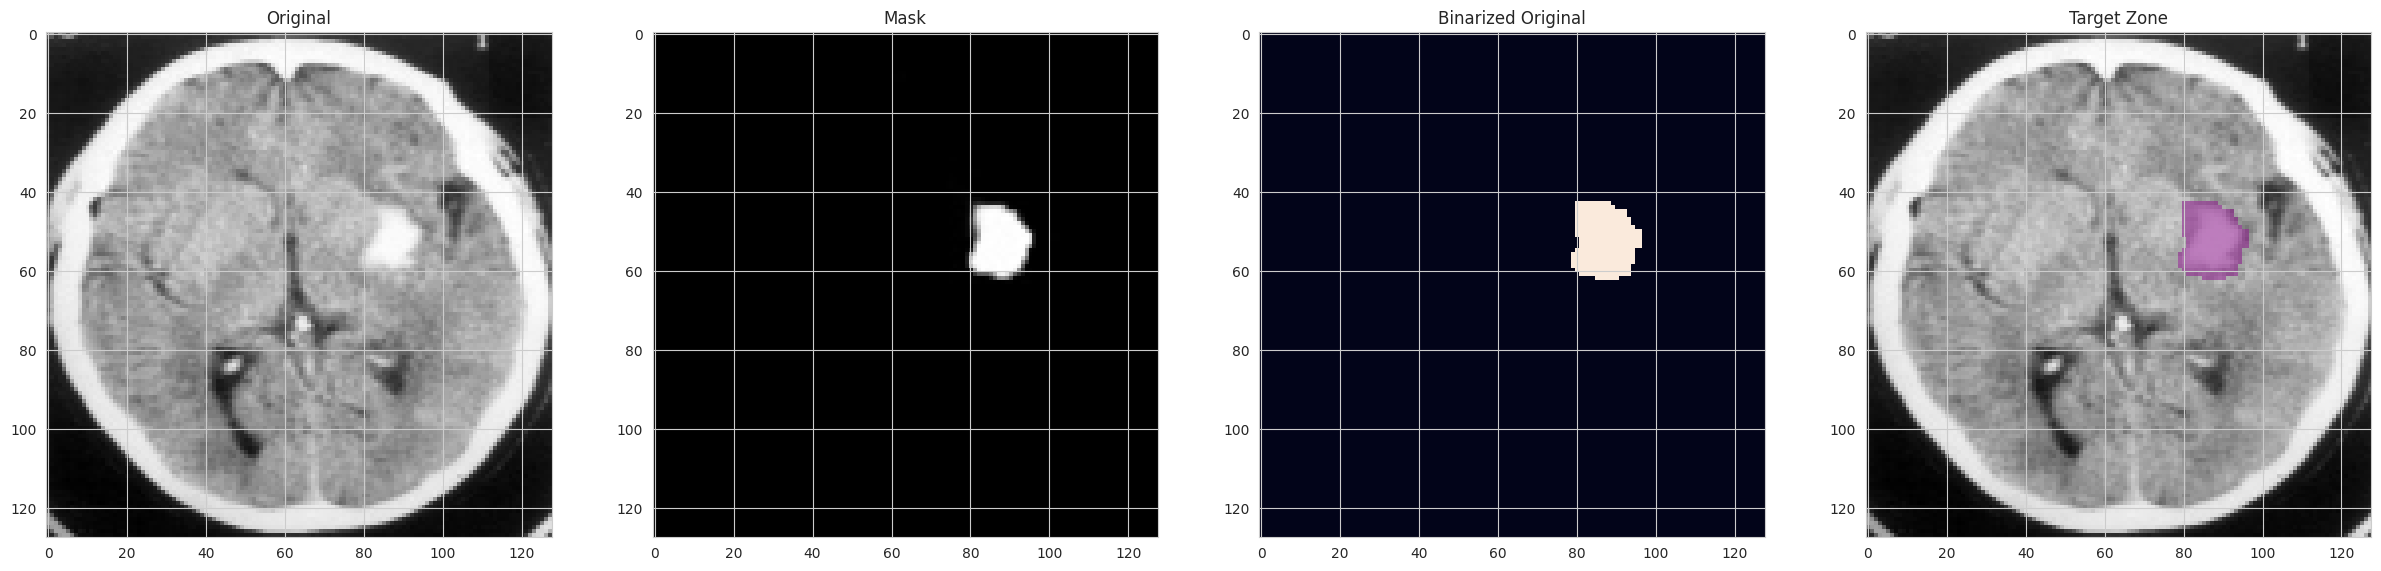

In [21]:
id = "035"


transparent_cmap = matplotlib.colors.ListedColormap(['none', 'purple'])

plt.figure(figsize=(30,30))
plt.subplot(1, 4, 1)
plt.imshow(images[int(id)],cmap="gray")
plt.title("Original")
plt.subplot(1, 4, 2)
plt.imshow(images2[id],cmap="binary_r")
plt.title("Mask")
# 图像融合显示
plt.subplot(1, 4, 3)
plt.imshow(cv2.threshold(images2[id], 10, 1, cv2.THRESH_BINARY)[1])
plt.title("Binarized Original")
plt.subplot(1,4,4)
plt.imshow(images[int(id)],cmap='gray')
plt.imshow(cv2.threshold(images2[id], 10, 1, cv2.THRESH_BINARY)[1],alpha=0.5,cmap=transparent_cmap)
plt.title("Target Zone")

plt.show()

In [114]:
import matplotlib

In [104]:
imb=cv2.threshold(images2[id], 10, 1, cv2.THRESH_BINARY)

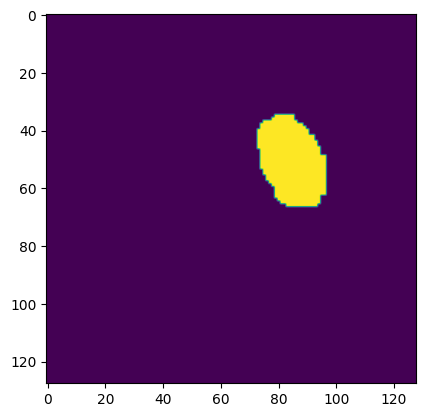

In [105]:
plt.imshow(Image.fromarray(imb[1]))

In [76]:
from PIL import Image